In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

(EDA & slicing)

In [ ]:
df=pd.read_csv('/content/retail_data.csv')
#df=pd.read_csv('retail_data.csv')
#Data set link https://www.kaggle.com/code/bipinneupane1/retail-spending-pattern-analysis/input?select=retail_data.csv
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [ ]:
df['Order_Status'].value_counts()

,count
Order_Status,
Delivered,130449
Shipped,65024
Processing,57199
Pending,49103


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [ ]:
cols_to_drop = ['Customer_ID','Transaction_ID','Name','Email','Phone','Address','Zipcode','Time']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
mask = (df['Date'] >= '2023-02-01') & (df['Date'] <= '2023-07-31')
fdata=df[mask].copy()
fdata

,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
2,Geelong,New South Wales,Australia,48.0,Male,Low,Regular,2023-04-26,2023.0,April,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
6,Kitchener,Ontario,Canada,29.0,Female,Low,New,2023-06-26,2023.0,June,...,630.115295,Electronics,Samsung,Television,Bad,Standard,Cash,Processing,1.0,QLED TV
7,Munich,Berlin,Germany,29.0,Male,Medium,Premium,2023-03-24,2023.0,March,...,46.588070,Clothing,Zara,Shirt,Bad,Same-Day,Cash,Processing,1.0,Dress shirt
10,Portsmouth,England,UK,64.0,Female,Low,Regular,2023-07-20,2023.0,July,...,363.927479,Home Decor,Home Depot,Tools,Average,Standard,Credit Card,Shipped,2.0,Screwdriver set
11,Portsmouth,England,UK,31.0,Female,Medium,Regular,2023-06-21,2023.0,June,...,364.830567,Books,Random House,Non-Fiction,Average,Standard,Credit Card,Pending,2.0,Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301980,Gold Coast,New South Wales,Australia,70.0,Female,Medium,New,2023-06-18,2023.0,June,...,1305.421584,Clothing,Zara,Dress,Excellent,Express,Cash,Processing,4.0,Sheath dress
301988,Bielefeld,Berlin,Germany,27.0,Male,Low,Premium,2023-06-16,2023.0,June,...,1729.573700,Clothing,Zara,Dress,Good,Express,Cash,Shipped,4.0,Fit and flare dress
301993,Wollongong,New South Wales,Australia,63.0,Female,Medium,Premium,2023-06-16,2023.0,June,...,2229.371402,Home Decor,IKEA,Furniture,Average,Same-Day,Cash,Delivered,2.0,Bed
301999,San Antonio,Florida,USA,55.0,Male,High,Premium,2023-07-18,2023.0,July,...,413.734856,Electronics,Samsung,Tablet,Excellent,Same-Day,Cash,Shipped,5.0,iPad


In [ ]:
fdata.isna().sum().sort_values(ascending=False)

,0
Shipping_Method,100
Amount,92
Total_Amount,87
Total_Purchases,86
Gender,82
Year,81
Product_Category,79
Product_Brand,77
Payment_Method,77
Income,71


In [ ]:
fdata['Order_Status'].value_counts()

,count
Order_Status,
Delivered,33052
Shipped,16396
Processing,14491
Pending,12493


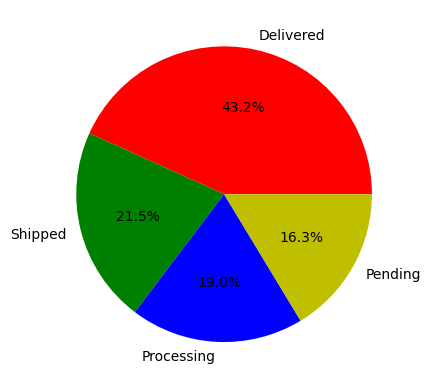

In [ ]:
Order_Status_labels = fdata['Order_Status'].value_counts().index

plt.pie(fdata['Order_Status'].value_counts(),labels=Order_Status_labels,autopct="%1.1f%%",colors=['r','g','b','y'])
plt.show()

In [ ]:
fdata['Order_Status'].value_counts()

,count
Order_Status,
Delivered,33052
Shipped,16396
Processing,14491
Pending,12493


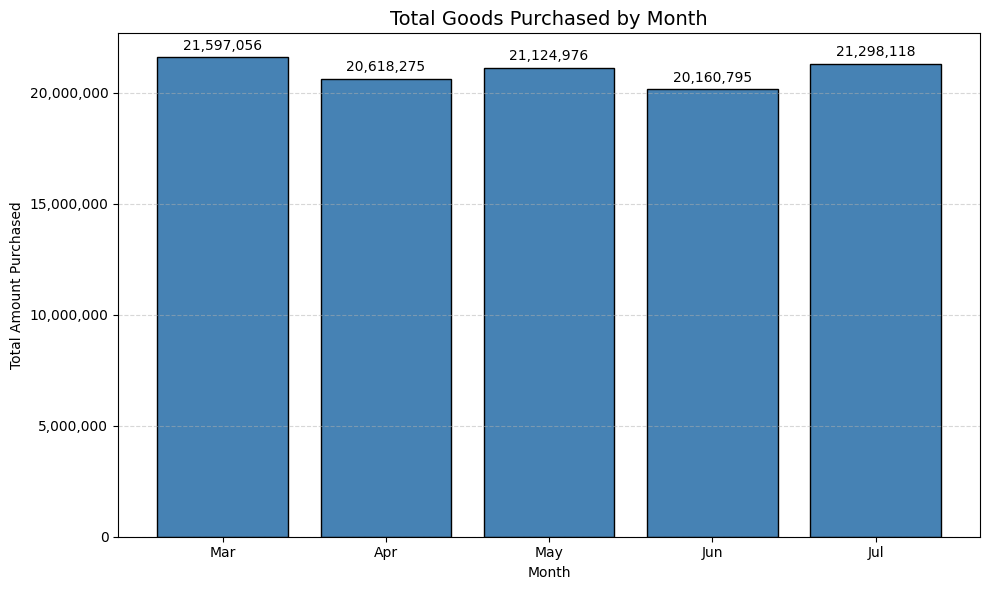

In [ ]:
fdata.loc[:, 'Date'] = pd.to_datetime(fdata['Date'], errors='coerce')
fdata.loc[:, 'Month_Num'] = fdata['Date'].dt.month
fdata.loc[:, 'Month_Name'] = fdata['Date'].dt.strftime('%b')

monthly_totals = fdata.groupby(['Month_Num', 'Month_Name'])['Total_Amount'].sum().sort_index()
months = [name for (_, name) in monthly_totals.index]
totals = monthly_totals.values

plt.figure(figsize=(10, 6))
bars = plt.bar(months, totals, color='steelblue', edgecolor='black')
plt.title('Total Goods Purchased by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Amount Purchased')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01*height, f'{height:,.0f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

As per fdata, the month of march saw the highest purchase

Text(0.5, 1.0, 'Monthly Sales by Product Category (Stack Plot)')

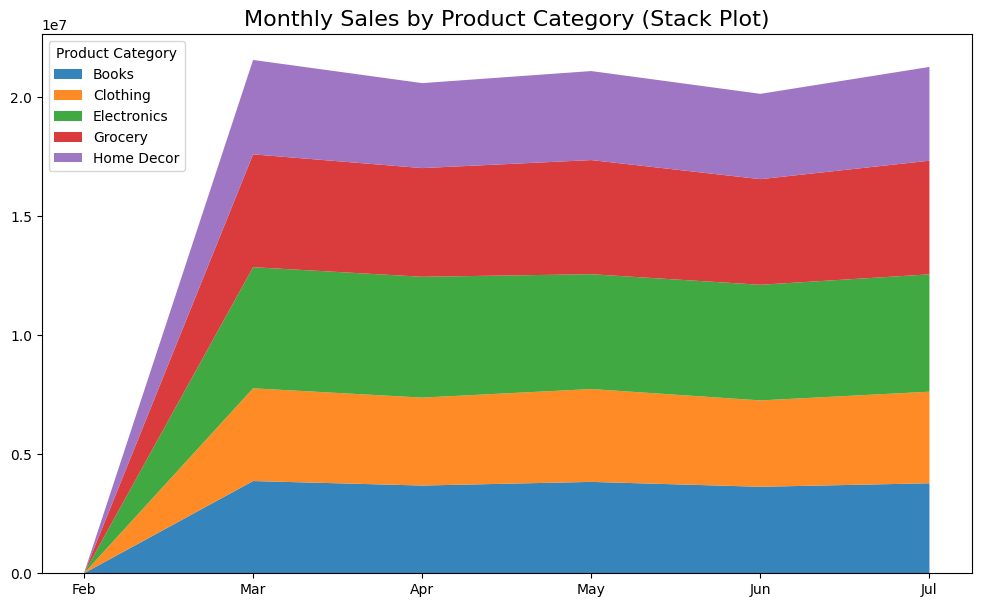

In [ ]:
fdata.loc[:, 'Date'] = pd.to_datetime(fdata['Date'], errors='coerce')
fdata.loc[:, 'Month_Name'] = fdata['Date'].dt.strftime('%b')


grouped = (

    fdata.groupby(['Month_Name', 'Product_Category'])['Total_Amount']
    .sum()
    .unstack(fill_value=0)

)


month_order = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']


grouped = grouped.reindex(month_order, fill_value=0)


months_for_plot = grouped.index
values = grouped.T.values
categories = grouped.columns

plt.figure(figsize=(12, 7))
plt.stackplot(months_for_plot, values, labels=grouped.columns, alpha=0.9)
plt.legend(loc='upper left', title='Product Category')

plt.title('Monthly Sales by Product Category (Stack Plot)', fontsize=16)

Almost all the categories have almost similar amounts of purchases,but if we observe closely,the Product Category="Electronics" has a more number of purchases in comparison to other categories

<Axes: xlabel='Age', ylabel='Count'>

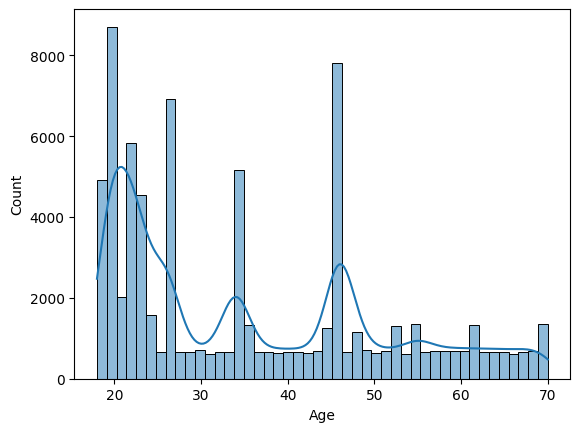

In [ ]:
sns.histplot(fdata['Age'],kde=True)

In [ ]:
fdata['Customer_Segment'].value_counts()

,count
Customer_Segment,
Regular,37120
New,23037
Premium,16276


<Axes: xlabel='Customer_Segment', ylabel='Total_Amount'>

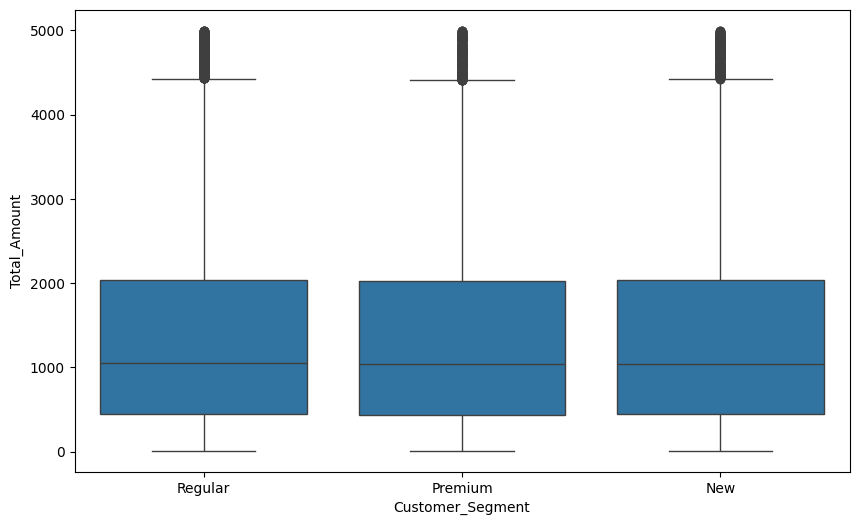

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=fdata, x='Customer_Segment', y='Total_Amount', order=['Regular', 'Premium', 'New'])

In [ ]:
Q1=fdata['Total_Amount'].quantile(0.25)
Q3=fdata['Total_Amount'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(Q1,Q3,IQR,lower_bound,upper_bound)
print(f"{Q1}, Q3 = {Q3}, IQR = {IQR}, Lower Bound = {lower_bound}, Upper Bound = {upper_bound}\n")

441.3592885 2034.977122 1593.6178335 -1949.0674617499997 4425.40387225
441.3592885, Q3 = 2034.977122, IQR = 1593.6178335, Lower Bound = -1949.0674617499997, Upper Bound = 4425.40387225



In [ ]:
max(fdata['Total_Amount'])

4997.006852

In [ ]:
fdata.loc[:, 'Total_Amount']=fdata['Total_Amount'].clip(lower_bound,upper_bound)

In [ ]:
max(fdata['Total_Amount'])

4425.40387225

In [ ]:
min(fdata['Total_Amount'])

10.00374959

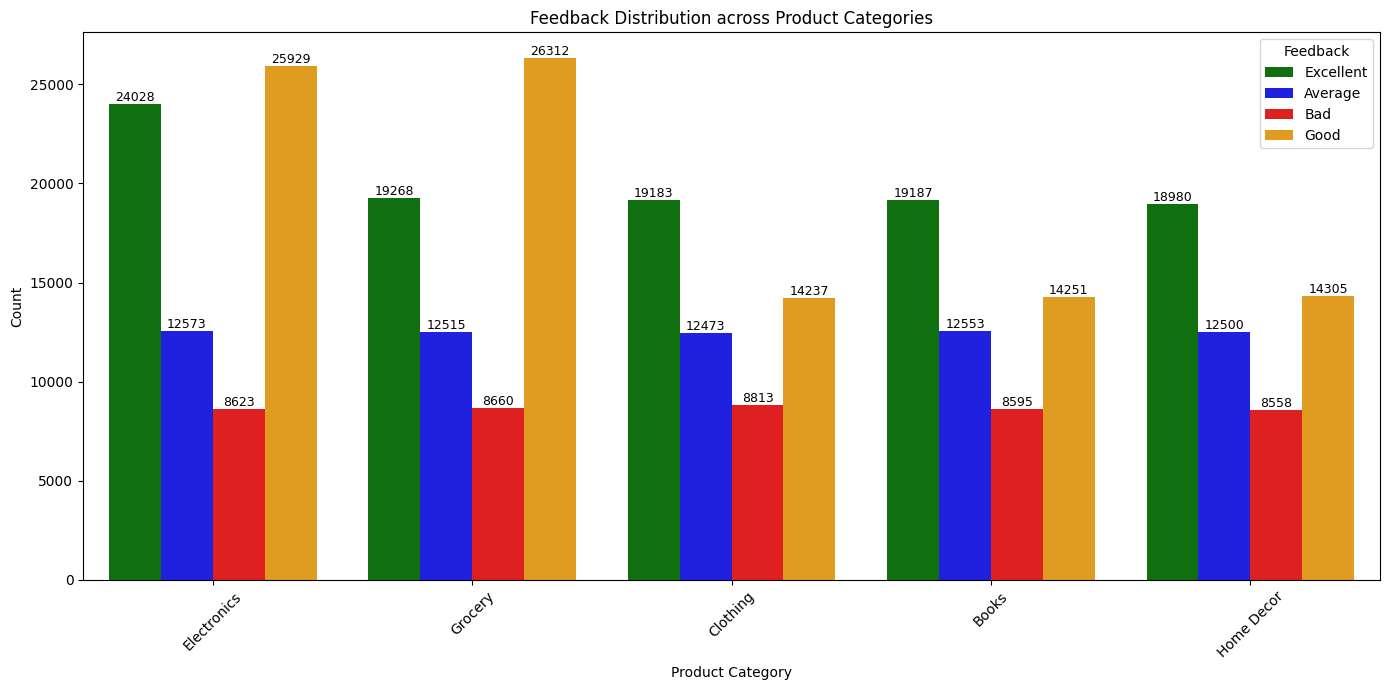

In [ ]:
custom_colors = ['g','b','r','#FFA500']
plt.figure(figsize=(14, 7))
plot=sns.countplot(data=df, x='Product_Category', hue='Feedback', order=df['Product_Category'].value_counts().index,palette=custom_colors)


for p in plot.patches:
    height = p.get_height()
    if height > 0:
        plot.annotate(f'{int(height)}',
                      (p.get_x() + p.get_width() / 2, height),
                      ha='center', va='bottom', fontsize=9, color='black')
plt.title('Feedback Distribution across Product Categories')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Feedback')
plt.tight_layout()
plt.show()


In [ ]:
t_sales = df.groupby(['Customer_Segment', 'Product_Category'])['Total_Purchases'].sum().unstack(fill_value=0)
t_sales

Product_Category,Books,Clothing,Electronics,Grocery,Home Decor
Customer_Segment,,,,,
New,89840.0,90341.0,108592.0,110861.0,89115.0
Premium,60080.0,60743.0,81206.0,82306.0,59472.0
Regular,141945.0,142224.0,191350.0,163850.0,142207.0


<Axes: xlabel='Customer_Segment'>

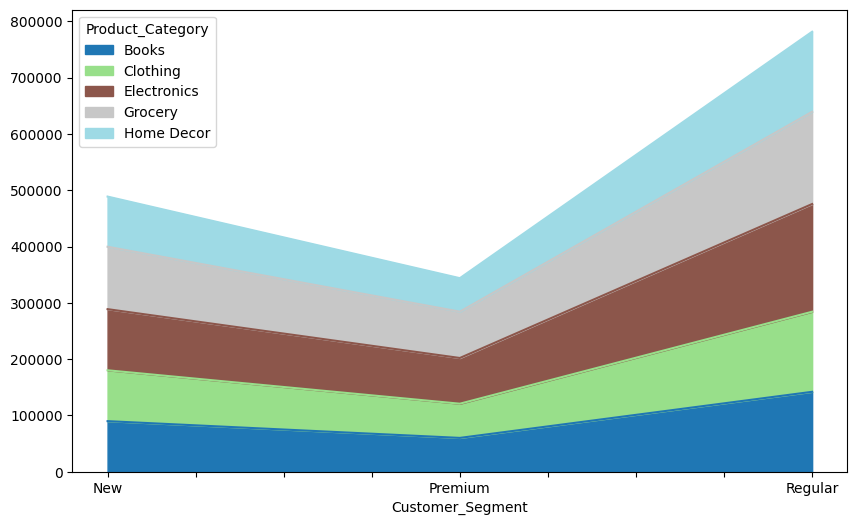

In [ ]:
t_sales.plot(kind='area', stacked=True, figsize=(10,6), colormap='tab20')

In [ ]:
june_2023_orders = fdata[
    (fdata['Year'] == 2023) &
    (fdata['Month'] == 'June')
]
june_2023_orders

,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,...,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Month_Num,Month_Name
6,Kitchener,Ontario,Canada,29.0,Female,Low,New,2023-06-26,2023.0,June,...,Samsung,Television,Bad,Standard,Cash,Processing,1.0,QLED TV,6,Jun
11,Portsmouth,England,UK,31.0,Female,Medium,Regular,2023-06-21,2023.0,June,...,Random House,Non-Fiction,Average,Standard,Credit Card,Pending,2.0,Science,6,Jun
15,Portsmouth,England,UK,43.0,Male,Medium,Regular,2023-06-15,2023.0,June,...,Random House,Literature,Bad,Express,Credit Card,Pending,1.0,Drama,6,Jun
29,Portsmouth,England,UK,50.0,Male,Medium,Regular,2023-06-21,2023.0,June,...,Coca-Cola,Juice,Good,Standard,Cash,Pending,3.0,Pomegranate juice,6,Jun
33,Portsmouth,England,UK,31.0,Male,Low,Regular,2023-06-29,2023.0,June,...,Samsung,Smartphone,Average,Express,Cash,Pending,2.0,Google Pixel,6,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301959,San Francisco,Iowa,USA,39.0,Male,Low,Regular,2023-06-22,2023.0,June,...,Samsung,Tablet,Average,Express,Cash,Processing,2.0,iPad,6,Jun
301965,Bremen,Berlin,Germany,62.0,Female,Low,Premium,2023-06-14,2023.0,June,...,HarperCollins,Non-Fiction,Average,Standard,Cash,Shipped,2.0,Travel,6,Jun
301980,Gold Coast,New South Wales,Australia,70.0,Female,Medium,New,2023-06-18,2023.0,June,...,Zara,Dress,Excellent,Express,Cash,Processing,4.0,Sheath dress,6,Jun
301988,Bielefeld,Berlin,Germany,27.0,Male,Low,Premium,2023-06-16,2023.0,June,...,Zara,Dress,Good,Express,Cash,Shipped,4.0,Fit and flare dress,6,Jun


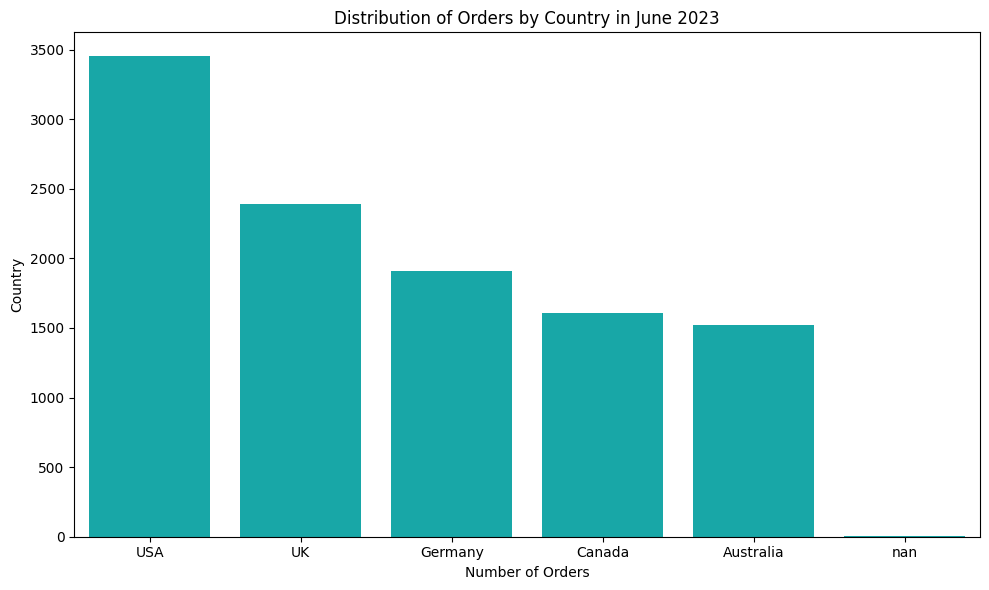

In [ ]:
june_2023_orders.loc[:, 'Country'] = june_2023_orders['Country'].astype(str)

plt.figure(figsize=(10, 6))
sns.countplot(data=june_2023_orders, x='Country', order=june_2023_orders['Country'].value_counts().index, color='c')
plt.title('Distribution of Orders by Country in June 2023')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

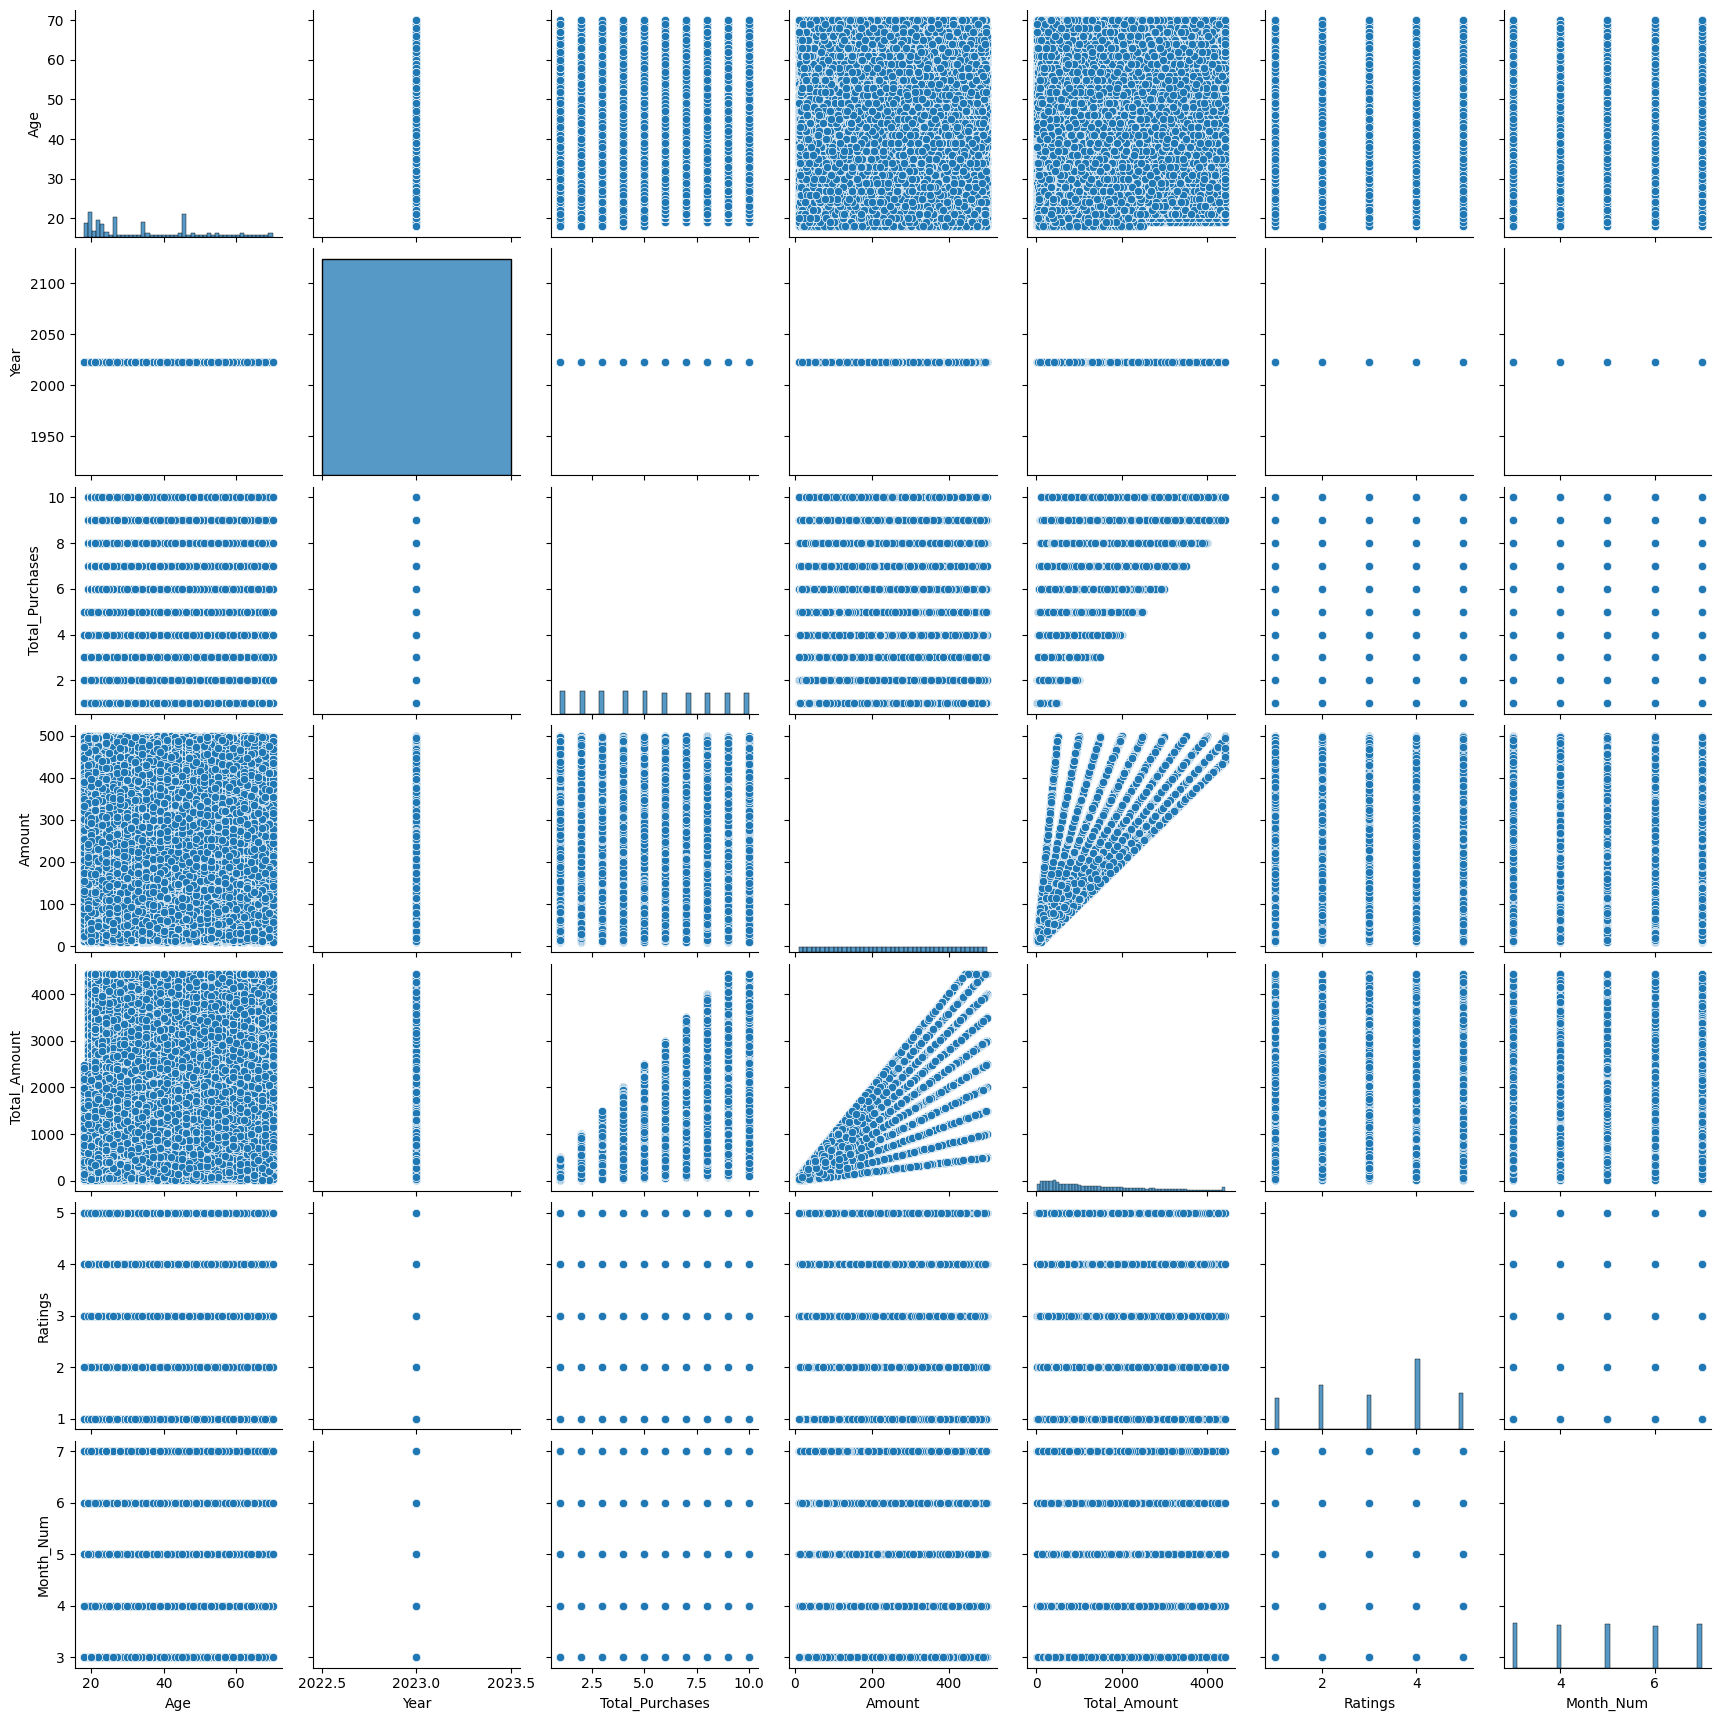

In [ ]:
sns.pairplot(fdata)

(Preprocessing)

In [ ]:
fdata.duplicated().sum()

np.int64(0)

In [ ]:
fdata.isna().sum()

,0
City,60
State,64
Country,70
Age,40
Gender,82
Income,71
Customer_Segment,49
Date,0
Year,81
Month,67


Checked for duplicate rows; found none.

In [ ]:
fdata.loc[fdata['Total_Amount'].isna() & fdata['Amount'].notna() & fdata['Total_Purchases'].notna(), 'Total_Amount'] = fdata['Amount'] * fdata['Total_Purchases']
fdata.loc[fdata['Amount'].isna() & fdata['Total_Amount'].notna() & fdata['Total_Purchases'].notna() & (fdata['Total_Purchases'] != 0), 'Amount'] = fdata['Total_Amount'] / fdata['Total_Purchases']
fdata.loc[fdata['Total_Purchases'].isna() & fdata['Total_Amount'].notna() & fdata['Amount'].notna() & (fdata['Amount'] != 0),'Total_Purchases'] = fdata['Total_Amount'] / fdata['Amount']

Filled NA in columns Amount, Total_Purchases, Total_Amount using formula: Total_Amount = Amount * Total_Purchases

In [ ]:
fdata['Date'] = pd.to_datetime(fdata['Date'], errors='coerce')
fdata['Year'] = fdata['Date'].dt.year
fdata['Month'] = fdata['Date'].dt.strftime('%B')

Filled NA in Year, Month by extracting data from Data column.

In [ ]:
for col in ['Gender', 'Income', 'Payment_Method', 'Shipping_Method', 'Product_Category', 'Product_Brand', 'Customer_Segment', 'Order_Status']:
    fdata[col] = fdata[col].fillna(fdata[col].mode()[0])
for col in ['Age','Ratings']:
    fdata[col] = fdata[col].fillna(fdata[col].median())
fdata[['City', 'State', 'Country']] = fdata[['City', 'State', 'Country']].fillna('Unknown')

Filled NA in categorical columns with mode value and NA in numerical columns with median values (most of them are skewed). Set NA in City, State, Country as "Unknown".

In [ ]:
fdata['Feedback'] = fdata['Feedback'].fillna('Neutral')

Filled NA in Feedback column as "Neutral"

In [ ]:
fdata.isna().sum()

,0
City,0
State,0
Country,0
Age,0
Gender,0
Income,0
Customer_Segment,0
Date,0
Year,0
Month,0


Missing values all filled.

In [ ]:
categorical_cols = [
    'Gender', 'Income', 'Month', 'Customer_Segment', 'Product_Category',
    'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method',
    'Payment_Method', 'Order_Status'
]


from sklearn.preprocessing import StandardScaler,MinMaxScaler

numeric_cols = ['Age', 'Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']

fdata_regression=fdata.copy()

fdata_regression= pd.get_dummies(fdata_regression, columns=categorical_cols, drop_first=True)

mmax_scaler =MinMaxScaler()

fdata_regression[numeric_cols] = mmax_scaler.fit_transform(fdata_regression[numeric_cols])

In [ ]:
scaler = StandardScaler()
fdata[numeric_cols] = scaler.fit_transform(fdata[numeric_cols])
fdata_dbs=fdata.copy()

In [ ]:
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
with open('models/product_data.pkl', 'wb') as f:
    pickle.dump(fdata[['products', 'Product_Category', 'Product_Brand', 'Product_Type']], f)

One-hot encoded categorical columns and standardized numerical columns.

In [ ]:
fdata

,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,...,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Month_Num,Month_Name
2,Geelong,New South Wales,Australia,0.832255,Male,Low,Regular,2023-04-26,2023,April,...,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,-0.885342,Sports equipment,4,Apr
6,Kitchener,Ontario,Canada,-0.432177,Female,Low,New,2023-06-26,2023,June,...,Samsung,Television,Bad,Standard,Cash,Processing,-1.644080,QLED TV,6,Jun
7,Munich,Berlin,Germany,-0.432177,Male,Medium,Premium,2023-03-24,2023,March,...,Zara,Shirt,Bad,Same-Day,Cash,Processing,-1.644080,Dress shirt,3,Mar
10,Portsmouth,England,UK,1.897040,Female,Low,Regular,2023-07-20,2023,July,...,Home Depot,Tools,Average,Standard,Credit Card,Shipped,-0.885342,Screwdriver set,7,Jul
11,Portsmouth,England,UK,-0.299079,Female,Medium,Regular,2023-06-21,2023,June,...,Random House,Non-Fiction,Average,Standard,Credit Card,Pending,-0.885342,Science,6,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301980,Gold Coast,New South Wales,Australia,2.296335,Female,Medium,New,2023-06-18,2023,June,...,Zara,Dress,Excellent,Express,Cash,Processing,0.632132,Sheath dress,6,Jun
301988,Bielefeld,Berlin,Germany,-0.565276,Male,Low,Premium,2023-06-16,2023,June,...,Zara,Dress,Good,Express,Cash,Shipped,0.632132,Fit and flare dress,6,Jun
301993,Wollongong,New South Wales,Australia,1.830491,Female,Medium,Premium,2023-06-16,2023,June,...,IKEA,Furniture,Average,Same-Day,Cash,Delivered,-0.885342,Bed,6,Jun
301999,San Antonio,Florida,USA,1.298099,Male,High,Premium,2023-07-18,2023,July,...,Samsung,Tablet,Excellent,Same-Day,Cash,Shipped,1.390870,iPad,7,Jul


(LabelEncoding and kNN)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

fdata["Month_Name"]=le.fit_transform(fdata["Month_Name"])
fdata["City"]=le.fit_transform(fdata["City"])
fdata["State"]=le.fit_transform(fdata["State"])
fdata["Country"]=le.fit_transform(fdata["Country"])
fdata["products"]=le.fit_transform(fdata["products"])

In [ ]:
fdata_content=fdata.copy()

One-hot encoded categorical columns and standardized numerical columns.



In [ ]:
fdata = pd.get_dummies(fdata, columns=categorical_cols, drop_first=True)

In [ ]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76482 entries, 2 to 302003
Data columns (total 87 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   City                                             76482 non-null  int64         
 1   State                                            76482 non-null  int64         
 2   Country                                          76482 non-null  int64         
 3   Age                                              76482 non-null  float64       
 4   Date                                             76482 non-null  datetime64[ns]
 5   Year                                             76482 non-null  int32         
 6   Total_Purchases                                  76482 non-null  float64       
 7   Amount                                           76482 non-null  float64       
 8   Total_Amount                            

In [ ]:
fdata[['Month_Num','Month_Name','Month_July','Month_June','Month_March','Month_May']]

,Month_Num,Month_Name,Month_July,Month_June,Month_March,Month_May
2,4,0,False,False,False,False
6,6,2,False,True,False,False
7,3,3,False,False,True,False
10,7,1,True,False,False,False
11,6,2,False,True,False,False
...,...,...,...,...,...,...
301980,6,2,False,True,False,False
301988,6,2,False,True,False,False
301993,6,2,False,True,False,False
301999,7,1,True,False,False,False


In [ ]:
fdata.drop(['Month_Name','Month_July','Month_June','Month_March','Month_May'],inplace=True,axis=1)

In [ ]:
fdata_kmeans=fdata.copy()

In [ ]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76482 entries, 2 to 302003
Data columns (total 82 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   City                                             76482 non-null  int64         
 1   State                                            76482 non-null  int64         
 2   Country                                          76482 non-null  int64         
 3   Age                                              76482 non-null  float64       
 4   Date                                             76482 non-null  datetime64[ns]
 5   Year                                             76482 non-null  int32         
 6   Total_Purchases                                  76482 non-null  float64       
 7   Amount                                           76482 non-null  float64       
 8   Total_Amount                            

Content based filtering

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder

In [ ]:

encoder = OneHotEncoder(handle_unknown='ignore')
product_features = fdata_content[[
    'Gender', 'Income', 'Month', 'Customer_Segment', 'Product_Category',
    'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method',
    'Payment_Method', 'Order_Status'
]]
product_encoded = encoder.fit_transform(product_features)

In [ ]:
with open('models/content_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [ ]:
with open('models/product_features.pkl', 'wb') as f:
    pickle.dump(product_encoded, f)

In [ ]:
new_user = {
    'Gender': 'Male',
    'Income': 'Low',
    'Month': 'September',
    'Customer_Segment': 'Regular',
    'Product_Category': 'Clothing',
    'Product_Brand': 'Nike',
    'Product_Type': 'Shorts',
    'Feedback': 'Excellent',
    'Shipping_Method': 'Same-Day',
    'Payment_Method': 'Credit Card',
    'Order_Status': 'Shipped'
}

In [ ]:
user_cat_input = encoder.transform([[
    new_user['Gender'],
    new_user['Income'],
    new_user['Month'],
    new_user['Customer_Segment'],
    new_user['Product_Category'],
    new_user['Product_Brand'],
    new_user['Product_Type'],
    new_user['Feedback'],
    new_user['Shipping_Method'],
    new_user['Payment_Method'],
    new_user['Order_Status']
]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [ ]:
similarity_scores = cosine_similarity(user_cat_input, product_encoded).flatten()


fdata_content['similarity'] = similarity_scores
already_bought_mask = (
    (fdata_content['Gender'] == new_user['Gender']) &
    (fdata_content['Income'] == new_user['Income']) &
    (fdata_content['Month'] == new_user['Month']) &
    (fdata_content['Customer_Segment'] == new_user['Customer_Segment']) &
    (fdata_content['Product_Category'] == new_user['Product_Category']) &
    (fdata_content['Product_Brand'] == new_user['Product_Brand']) &
    (fdata_content['Product_Type'] == new_user['Product_Type']) &
    (fdata_content['Feedback'] == new_user['Feedback']) &
    (fdata_content['Shipping_Method'] == new_user['Shipping_Method']) &
    (fdata_content['Payment_Method'] == new_user['Payment_Method']) &
    (fdata_content['Order_Status'] == new_user['Order_Status'])
)
recommendations = (
    fdata_content[~already_bought_mask]
    .sort_values(by='similarity', ascending=False)
    .drop_duplicates(subset='products')
    .head(10)
)
recommendations['products']=le.inverse_transform(recommendations['products'])
print("🛍️ Recommended products for the new user:")
print(recommendations[['products', 'Product_Category', 'Product_Brand', 'Product_Type']])

🛍️ Recommended products for the new user:
                 products Product_Category Product_Brand Product_Type
106939       Khaki shorts         Clothing          Nike       Shorts
174758     Cycling shorts         Clothing          Nike       Shorts
45541         Swim trunks         Clothing          Nike       Shorts
101186       Cargo shorts         Clothing          Nike       Shorts
107362       Denim shorts         Clothing          Nike       Shorts
231536    Athletic shorts         Clothing          Nike       Shorts
221224             Skorts         Clothing          Nike       Shorts
96439      Bermuda shorts         Clothing          Nike       Shorts
99788   Button-down shirt         Clothing          Zara        Shirt
235241         Henley tee         Clothing          Nike      T-shirt


In [ ]:
# with open('cosine_sim_matrix_customer_suggestion.pkl', 'wb') as f:
  # pickle.dump(similarity_scores, f)

In [ ]:
# with open('one_hot_scaler.pkl', 'wb') as f:
#     pickle.dump(encoder, f)

In [ ]:
# with open('fdata_content.pkl', 'wb') as file:
#     pickle.dump(fdata_content, file)
#     print("fdata_content DataFrame saved successfully as 'fdata_content.pkl'")

End - Content based filtering

Kmeans

In [ ]:
# Convert all bool columns to int (0 or 1)
bool_cols = fdata_kmeans.select_dtypes(include='bool').columns


fdata_kmeans[bool_cols] = fdata_kmeans[bool_cols].astype(int)
fdata_kmeans['Date'] = df['Date'].astype('int64')
fdata_kmeans=fdata_kmeans.drop(columns=['Country','City','State'])
fdata_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76482 entries, 2 to 302003
Data columns (total 79 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Age                                              76482 non-null  float64
 1   Date                                             76482 non-null  int64  
 2   Year                                             76482 non-null  int32  
 3   Total_Purchases                                  76482 non-null  float64
 4   Amount                                           76482 non-null  float64
 5   Total_Amount                                     76482 non-null  float64
 6   Ratings                                          76482 non-null  float64
 7   products                                         76482 non-null  int64  
 8   Month_Num                                        76482 non-null  int32  
 9   Gender_Male                     

In [ ]:
fdata_kmeans=fdata_kmeans.drop(columns=['Date',"Year"])

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pca_cluster = PCA(n_components=0.95, random_state=42)
reduced_data = pca_cluster.fit_transform(fdata_kmeans)

print(f"Original shape: {fdata_kmeans.shape}")
print(f"Reduced shape after PCA: {reduced_data.shape}")


k = 5
n_clusters=k
kmeans = KMeans(n_clusters, random_state=42)
labels = kmeans.fit_predict(reduced_data)

#sillhouette score takes a long time to find
score = silhouette_score(reduced_data, labels)
print(f"Silhouette Score (k={k} after PCA): {score:.4f}")

Original shape: (76482, 77)
Reduced shape after PCA: (76482, 1)
Silhouette Score (k=5 after PCA): 0.5615


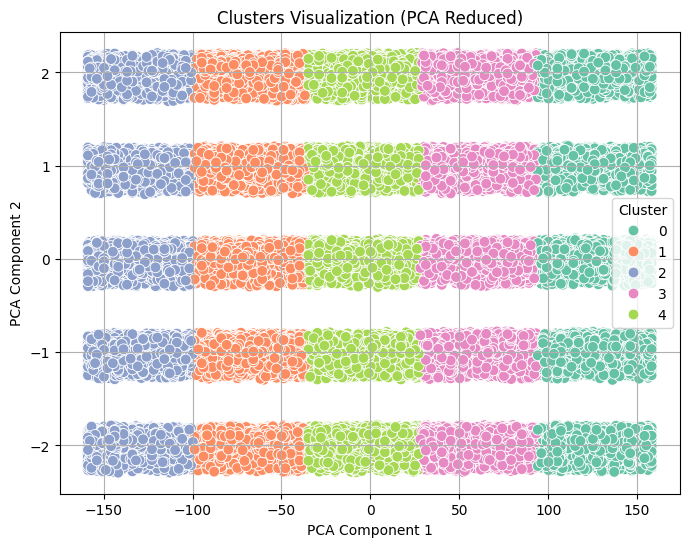

In [ ]:
from sklearn.decomposition import PCA

# Add the cluster labels to the dataframe
fdata_kmeans['Cluster'] = labels

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(fdata_kmeans.drop(columns=['Cluster']))  # Exclude the cluster label
fdata_kmeans['PCA1'] = pca_result[:, 0]
fdata_kmeans['PCA2'] = pca_result[:, 1]


plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=fdata_kmeans, palette='Set2', s=60)
plt.title("Clusters Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
new_user = {
    'Age': 70,
    'Total_Purchases': 3,
    'Amount': 403,
    'Total_Amount': 806 ,
    'Ratings': 4,
    'Month': 'September',
    'Gender': 'Male',
    'Income': 'Low',
    'Customer_Segment': 'Regular',
    'Product_Category': 'Clothing',
    'Product_Brand': 'Nike',
    'Product_Type': 'Shorts',
    'Feedback': 'Excellent',
    'Shipping_Method': 'Same-Day',
    'Payment_Method': 'Credit Card',
    'Order_Status': 'Shipped'
}


user_df = pd.DataFrame([new_user])

scaled_values = scaler.transform(user_df[['Age', 'Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']])[0]

user_df[['Age', 'Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']] = scaled_values


user_df = pd.get_dummies(user_df, columns=categorical_cols, drop_first=True)

user_df = user_df.reindex(columns = fdata_kmeans.drop(columns=['Cluster', 'PCA1', 'PCA2']).columns, fill_value=0)



user_reduced = pca_cluster.transform(user_df)
user_reduced=user_reduced.reshape(1,-1)

predicted_cluster = kmeans.predict(user_reduced)

print(f" This user belongs to Cluster: {predicted_cluster}")

 This user belongs to Cluster: [2]


In [ ]:
df['Feedback'].value_counts()

,count
Feedback,
Excellent,100755
Good,95098
Average,62674
Bad,43299


In [ ]:
# with open('kmeans_cluster.pkl', 'wb') as f:
#     pickle.dump(predicted_cluster, f)

In [ ]:
print(fdata_kmeans['Cluster'].value_counts())

Cluster
4    16871
3    16860
1    14767
0    14490
2    13494
Name: count, dtype: int64


In [ ]:
cluster_id = predicted_cluster[0]
cluster_data = fdata_kmeans[fdata_kmeans['Cluster'] == cluster_id]

In [ ]:
brand_cols = [col for col in fdata_kmeans.columns if 'Product_Brand_' in col]
type_cols = [col for col in fdata_kmeans.columns if 'Product_Type_' in col]

brand=fdata_kmeans.groupby('Cluster')[brand_cols].mean().loc[cluster_id].sort_values(ascending=False).head(5)
brand_names = brand.index.str.replace('Product_Brand_', '', regex=False)
print(f"The top brands in the cluster {cluster_id} are:")
print(brand_names.tolist())

The top brands in the cluster 2 are:
['Pepsi', 'Nestle', 'Zara', 'Penguin Books', 'Nike']


In [ ]:
type_product=fdata_kmeans.groupby('Cluster')[type_cols].mean().loc[cluster_id].sort_values(ascending=False).head(5)
type_product_names = type_product.index.str.replace('Product_Type_', '', regex=False)
print(f"The most type of products in the cluster {cluster_id} are:")
print(type_product_names.tolist())



The most type of products in the cluster 2 are:
['Water', 'Tablet', 'Non-Fiction', 'Shorts', 'Furniture']


In [ ]:
cat_cols = [col for col in fdata_kmeans.columns if 'Category_' in col]


cat=fdata_kmeans.groupby('Cluster')[cat_cols].mean().loc[cluster_id].sort_values(ascending=False).head(5)
cat_names = cat.index.str.replace('Product_Category_', '', regex=False)
print(f"The Categories in the cluster {cluster_id} are:")
print(cat_names.tolist())

The Categories in the cluster 2 are:
['Grocery', 'Electronics', 'Clothing', 'Home Decor']


In [ ]:
with open('models/kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

with open('models/pca_cluster.pkl', 'wb') as f:
    pickle.dump(pca_cluster, f)

End- kmeans

Customer Spending Prediction(Regression)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
fdata_regression['Month_Name']=le.fit_transform(fdata_regression['Month_Name'])

In [ ]:


fdata_regression['Amount_x_Purchases'] = fdata_regression['Amount'] * fdata_regression['Total_Purchases']
fdata_regression['Age_x_Amount'] = fdata_regression['Age'] * fdata_regression['Amount']
fdata_regression['Age_x_Purchases'] = fdata_regression['Age'] * fdata_regression['Total_Purchases']
#dropping unwanted columns
X = fdata_regression.drop(columns=['Date', 'Total_Amount', 'City', 'State', 'Country', 'products','Year'])

#Since there exists many total_amounts in 'fdata_regression',we simply take the logarithm(log to base 100)
y = (np.log2(fdata_regression['Total_Amount']+ 1))/np.log(100)
exclude_cols = ['Date', 'Total_Amount', 'City', 'State', 'Country', 'products', 'Year']
feature_cols = [col for col in fdata_regression.columns if col not in exclude_cols]
# removing problematic values in y
valid_indices = y.replace([np.inf, -np.inf], np.nan).dropna().index
X = X.loc[valid_indices]
y = y.loc[valid_indices]


# check for NaNs and inf in X and y after subsetting
print("NaNs in X after subsetting:", X.isnull().sum().sum())

print("NaNs in y after subsetting:", y.isnull().sum())
print("Infs in y after subsetting:", np.isinf(y).sum())


# Model training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.95, random_state=42
)

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

'''param_distributions = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.03, 0.05, 0.07],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_'''

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=1.0
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

#model training takes a lot of time
#print("Best Params:", random_search.best_params_)
print("MSE:", mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
print("R² (total_amount's logarithmic accuracy):", r2_score(y_test, y_pred))
print("R² (model accuracy):", r2_score(np.expm1(y_test), np.expm1(y_pred)))

NaNs in X after subsetting: 0
NaNs in y after subsetting: 0
Infs in y after subsetting: 0
MSE: 2.602566781703624e-07
R² (total_amount's logarithmic accuracy): 0.9999234629306489
R² (model accuracy): 0.9999213736960898


In [ ]:
with open('models/feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_cols, f)


In [ ]:
with open('models/xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)


In [ ]:
test_input = {
    'Country': 'UK',
    'Age': 70,
    'Gender': 'Male',
    'Income': 'Medium',
    'Month_Num': 6,
    'Customer_Segment': 'New',
    'Product_Category': 'Electronics',
    'Product_Brand': 'Samsung',
    'Product_Type': 'Smartphone',
    'Payment_Method': 'Credit Card',
    'Shipping_Method': 'Standard'
}

In [ ]:
if 'Month_Name' in test_input:
    month_name = test_input['Month_Name']
elif 'Month_Num' in test_input:
    month_map = {
        1: 'January', 2: 'February', 3: 'March',
        4: 'April', 5: 'May', 6: 'June',
        7: 'July', 8: 'August', 9: 'September',
        10: 'October', 11: 'November', 12: 'December'
    }
    month_name = test_input['Month_Num']+1
else:
    raise ValueError("Must provide Month_Name or Month_Num in test_input!")

month_col = f"Month_{month_name}"



In [ ]:
# Create empty DataFrame with same columns
test_case = pd.DataFrame([0] * len(X.columns)).T
test_case.columns = X.columns

# Fill numeric fields
test_case.loc[0, 'Age'] = test_input['Age']
if month_col in test_case.columns:
    test_case.loc[0, month_col] = 1



# Map one-hots
one_hot_fields = [
    f"Gender_{test_input['Gender']}",
    f"Income_{test_input['Income']}",
    f"Customer_Segment_{test_input['Customer_Segment']}",
    f"Product_Category_{test_input['Product_Category']}",
    f"Product_Brand_{test_input['Product_Brand']}",
    f"Product_Type_{test_input['Product_Type']}",
    f"Payment_Method_{test_input['Payment_Method']}",
    f"Shipping_Method_{test_input['Shipping_Method']}",
    f"Country_{test_input['Country']}"
]

for col in one_hot_fields:
    if col in test_case.columns:
        test_case.loc[0, col] = 1

# Done!
print(test_case)

   Age  Total_Purchases  Amount  Ratings  Month_Num  Month_Name  Gender_Male  \
0   70                0       0        0          0           0            1   

   Income_Low  Income_Medium  Month_July  ...  Shipping_Method_Standard  \
0           0              1           0  ...                         1   

   Payment_Method_Credit Card  Payment_Method_Debit Card  \
0                           1                          0   

   Payment_Method_PayPal  Order_Status_Pending  Order_Status_Processing  \
0                      0                     0                        0   

   Order_Status_Shipped  Amount_x_Purchases  Age_x_Amount  Age_x_Purchases  
0                     0                   0             0                0  

[1 rows x 83 columns]


In [ ]:
#Reindexing or realignment of data based on specific set
#new_customer_df = new_customer_df.reindex(columns=X.columns, fill_value=0)


In [ ]:
log_pred = xgb_model.predict(test_case)
print(log_pred[0])
spend_pred = 100*np.exp(1+log_pred)
print(f"Predicted spend for this customer: ${spend_pred[0]:.2f}")

0.0008842374
Predicted spend for this customer: $272.07


In [ ]:
# with open('xgb_price_predict.pkl', 'wb') as f:
#     pickle.dump(log_pred, f)

End

DBS

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    le = LabelEncoder()
    fdata_dbs[col] = le.fit_transform(fdata_dbs[col])

In [ ]:
#please use nvidia tegra t4 as the runtime due to cuda requirement
import cupy as cp
from cuml.cluster import DBSCAN
from cuml.metrics.cluster import silhouette_score

def dbscan_param_search_gpu(data, eps_values, min_samples_values):
    """
    Performs a grid search over DBSCAN parameters on GPU.
    Returns a DataFrame summarizing eps, min_samples, number of clusters,
    number of noise points, and silhouette score.
    """
    # Convert data to cupy array for GPU computations
    data_gpu = cp.asarray(data)

    results = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            db = DBSCAN(eps=eps, min_samples=min_samples)
            labels = db.fit_predict(data_gpu).get()  # get() to bring back to CPU

            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = (labels == -1).sum()

            # Compute silhouette score only if >=2 clusters
            if n_clusters >= 2:
                try:
                    sil_score = float(silhouette_score(data_gpu, labels))
                except:
                    sil_score = cp.nan
            else:
                sil_score = cp.nan

            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_noise_points': n_noise,
                'silhouette_score': sil_score
            })

    results_df = pd.DataFrame(results)

    # Sort by silhouette score descending, NaNs at bottom
    results_df = results_df.sort_values(by='silhouette_score', ascending=False, na_position='last')

    #print top 5 results
    print("\nTop 5 parameter combinations by silhouette score:")
    print(results_df.head(5).to_string(index=False))

    return results_df


In [ ]:
fdata_dbs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76482 entries, 2 to 302003
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   City              76482 non-null  object        
 1   State             76482 non-null  object        
 2   Country           76482 non-null  object        
 3   Age               76482 non-null  float64       
 4   Gender            76482 non-null  int64         
 5   Income            76482 non-null  int64         
 6   Customer_Segment  76482 non-null  int64         
 7   Date              76482 non-null  datetime64[ns]
 8   Year              76482 non-null  int32         
 9   Month             76482 non-null  int64         
 10  Total_Purchases   76482 non-null  float64       
 11  Amount            76482 non-null  float64       
 12  Total_Amount      76482 non-null  float64       
 13  Product_Category  76482 non-null  int64         
 14  Product_Brand     76482 no

In [ ]:
from sklearn.datasets import make_blobs

features = fdata_dbs.select_dtypes(include=[np.number])
eps_values = np.arange(4,5,0.1)
min_samples_values = np.arange(16,40)

#param search takes a long time and the parameters where found previously so no need
#results_df = dbscan_param_search_gpu(features, eps_values, min_samples_values)

In [ ]:
# Fit DBSCAN
dbscan = DBSCAN(eps=4.6, min_samples=32)
dbscan.fit(features)

fdata_dbs['Cluster'] = dbscan.labels_

print(fdata_dbs['Cluster'].value_counts())

[2025-09-06 15:46:44.124] [CUML] [info] Batch size limited by the chosen integer type (4 bytes). 33080 -> 28078. Using the larger integer type might result in better performance
Cluster
 0    60446
 2     7731
 1     4676
 3     3623
-1        6
Name: count, dtype: int64


In [ ]:
#Made into a comment to reduce runtime

#labels = dbscan.labels_
# Filter noise points for silhouette score
#mask = labels != -1
#if len(set(labels[mask])) > 1:
#    score = silhouette_score(features[mask], labels[mask])
#    print(f"Silhouette Score (without noise points): {score:.3f}")
#else:
#    print("Not enough clusters for silhouette score.")

End -DBS

Hierarchial Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
data = fdata.copy()
features = ['Age', 'Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']
X = data[features]
X = X.sample(n=10000, random_state=42)
linked = linkage(X, method='ward')


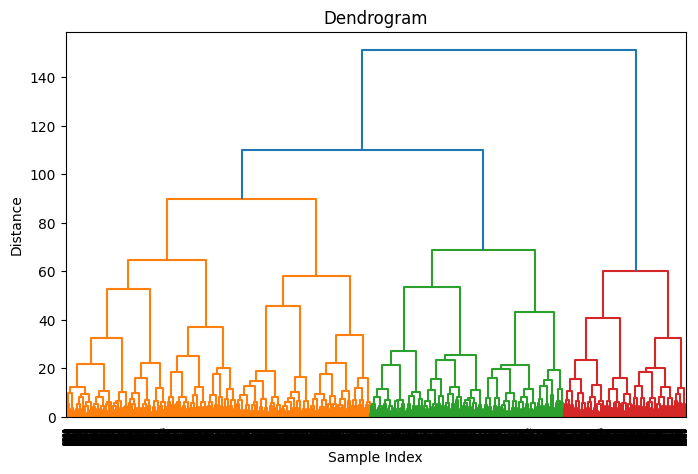

In [ ]:
plt.figure(figsize=(8, 5))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [ ]:
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
data = data.sample(n=10000, random_state=42)
data['Cluster'] = agg_clustering.fit_predict(X)

In [ ]:
def generate_product_suggestions(data, original_df, top_n=5):
    cluster_suggestions = {}

    for cluster_id in range(n_clusters):
        cluster_data = data[data['Cluster'] == cluster_id]


        original_indices = cluster_data.index


        original_cluster_data = original_df.loc[original_indices]


        top_products = (original_cluster_data['products'].value_counts()
                       .head(top_n).index.tolist())


        cluster_profile = {
            'Avg_Age': cluster_data['Age'].mean(),
            'Avg_Amount': cluster_data['Amount'].mean(),
            'Avg_Spending': cluster_data['Total_Amount'].mean(),
            'Purchase_Frequency': cluster_data['Total_Purchases'].mean(),
            'Avg_Rating': cluster_data['Ratings'].mean(),
            'Top_Products': top_products,
            'Preferred_Categories': original_cluster_data['Product_Category'].mode().tolist(),
            'Preferred_Brands': original_cluster_data['Product_Brand'].mode().tolist()
        }

        cluster_suggestions[f'Cluster_{cluster_id}'] = cluster_profile

    return cluster_suggestions

In [ ]:
product_suggestions = generate_product_suggestions(data, df)
for cluster, suggestions in product_suggestions.items():
  avg_values = [suggestions['Avg_Age'], suggestions['Purchase_Frequency'], suggestions['Avg_Amount'], suggestions['Avg_Spending'], suggestions['Avg_Rating']]
  inverse_transformed_values = scaler.inverse_transform([avg_values])[0]

  age = inverse_transformed_values[0]
  total_purchases = inverse_transformed_values[1]
  amount = inverse_transformed_values[2]
  total_amount = inverse_transformed_values[3]
  ratings = inverse_transformed_values[4]

  print(f"\n{cluster} Profile:")
  print(f"- Average Age: {age:.1f}")
  print(f"- Average Amount per Purchase: ${amount:.2f}")
  print(f"- Average Spending: ${total_amount:.2f}")
  print(f"- Purchase Frequency: {total_purchases:.1f} purchases")
  print(f"- Average Rating Given: {ratings:.1f}/5")

  print("\nPreferred Categories:")
  print(", ".join(suggestions['Preferred_Categories']))

  print("\nPreferred Brands:")
  print(", ".join(suggestions['Preferred_Brands']))

  print("\nTop Product Recommendations:")
  for i, product in enumerate(suggestions['Top_Products'], 1):
    print(f"{i}. {product}")

  print("\n" + "-"*50)


Cluster_0 Profile:
- Average Age: 35.9
- Average Amount per Purchase: $357.16
- Average Spending: $1197.83
- Purchase Frequency: 3.4 purchases
- Average Rating Given: 3.2/5

Preferred Categories:
Electronics

Preferred Brands:
Pepsi

Top Product Recommendations:
1. Coconut water
2. Adventure
3. Flavored water
4. Spring water
5. Purified water

--------------------------------------------------

Cluster_1 Profile:
- Average Age: 37.1
- Average Amount per Purchase: $395.34
- Average Spending: $3219.85
- Purchase Frequency: 8.2 purchases
- Average Rating Given: 3.1/5

Preferred Categories:
Electronics

Preferred Brands:
Pepsi

Top Product Recommendations:
1. Artesian water
2. Purified water
3. Self-help
4. Alkaline water
5. iPhone

--------------------------------------------------

Cluster_2 Profile:
- Average Age: 34.5
- Average Amount per Purchase: $139.90
- Average Spending: $1083.85
- Purchase Frequency: 7.7 purchases
- Average Rating Given: 3.2/5

Preferred Categories:
Electronics


End